# Importações e Funções Exemplos

In [27]:
import numpy as np   # Biblioteca númerica python.
import matplotlib.pyplot as plt  # Biblioteca de Visualização de Dados.
import time  # Biblioteca fornece funções paa trabalhar com o tempo.
import pandas as pd # Biblioteca para Manipulação e análise de dados.
from IPython.display import display, HTML # Biblioteca que Formata e controla saída visual.


# =============================================================================
# PROBLEMA 1: Concentração de uma bactéria (Requisito: f(t) = 8e^(-0.01t) * sen(t) - 1. Encontrar o zero f(t)=0)
# =============================================================================
def f1(t):
    """Função do Problema 1: 8 * exp(-0.01*t) * sin(t) - 1"""
    return 8 * np.exp(-0.01 * t) * np.sin(t) - 1

def df1(t):
    """Derivada de f1(t) para o Método de Newton-Raphson."""
    # f'(t) = 8 * exp(-0.01*t) * (cos(t) - 0.01*sin(t))
    return 8 * np.exp(-0.01 * t) * (np.cos(t) - 0.01 * np.sin(t))

# =============================================================================
# PROBLEMA 2: Deslocamento de estruturas (Requisito: y(t) = 10e^(-0.5t) * cos(2t). Encontrar t para y(t)=5)
# A função para encontrar a raiz (zero) é g(t) = y(t) - 5
# =============================================================================
def f2(t):
    """Função do Problema 2: 10 * exp(-0.5*t) * cos(2*t) - 5"""
    return 10 * np.exp(-0.5 * t) * np.cos(2 * t) - 5

def df2(t):
    """Derivada de f2(t) para o Método de Newton-Raphson."""
    # f'(t) = -5 * exp(-0.5*t) * (cos(2t) + 4*sin(2t))
    return -5 * np.exp(-0.5 * t) * (np.cos(2 * t) + 4 * np.sin(2 * t))

# Métodos : Bissecção, falsa-posicao, Newton e Secante


In [30]:

def encontrar_intervalo(f, ponto_inicial=0, passo=1.5, max_iter=100):
    """
    Busca um intervalo [a, b] para o método da bisseção, priorizando
    a busca por raízes positivas. Caso não encontre será buscado o intervalo negativo

    a (float): O limite inferior do intervalo.
    b (float): O limite superior do intervalo.
    """
    # 1. Tenta encontrar um intervalo positivo
    a = ponto_inicial
    b = ponto_inicial + passo
    for _ in range(max_iter):
        if np.sign(f(a)) * np.sign(f(b)) < 0:
            return a, b
        
        # Expande o intervalo para a direita
        a = b
        b += passo

    # 2. Se a busca positiva falhar, tenta no intervalo negativo
    a = ponto_inicial
    b = ponto_inicial - passo
    for _ in range(max_iter): # Interage até achar uma mudança de sinal
        if np.sign(f(a)) * np.sign(f(b)) < 0: #função sign determina o sinal da função se é negativo ou positivo
            return a, b
        
        # Expande o intervalo para a esquerda
        a = b
        b -= passo

    print("Não foi possível encontrar um intervalo com sinais opostos dentro do limite de iterações.")
    return None, None


def metodo_bisseccao(f, a, b, tol=1e-6, max_iter=100):
    """
    Argumentos:
        f (function): A função f(x).
        a (float): O limite inferior do intervalo.
        b (float): O limite superior do intervalo.
        tol (float): A tolerância para a raiz.
        max_iter (int): O número máximo de iterações.

    Returns:
        float: A raiz aproximada.
        list: Uma lista dos pontos médios calculados em cada iteração.
    """
    if np.sign(f(a)) * np.sign(f(b)) >= 0:
        print("O método da bisseção pode não funcionar. A função deve ter sinais opostos nos extremos do intervalo.")
        return None, []

    # Lista para armazenar os pontos médios para visualização
    pontos_medios = []
    
    for i in range(max_iter):
        c = (a + b) / 2.0
        pontos_medios.append(c)
        
        # Se a raiz for encontrada dentro da tolerância
        if np.abs(f(c)) < tol:
            print(f"Raiz encontrada em {c} após {i+1} iterações.")
            return c, pontos_medios
        
        # Atualiza o intervalo
        if np.sign(f(c)) * np.sign(f(a)) < 0:
            b = c
        else:
            a = c
            
    print(f"O método não convergiu após {max_iter} iterações. A última aproximação foi {c}")
    return c, pontos_medios

################################################################################################################################

def falsa_posicao(f, a, b, tol = 1e-6, max_iter = 100):
    # verifica a existência de algum zero no intervalo [a,b], ou seja, se f(a)*f(b)>=0, não há zeros no intervalo
    if np.sign(f(a)) * np.sign(f(b)) >= 0:
        print("Não existe zero nesse intervalo [a, b]")
        return None, []
    
    pontos_medios = []
    
    for i in range(max_iter):
        # "estabelece" o xi para a iteração
        xi=(a*f(b)-b*f(a))/(f(b)-f(a))
        # adiciona xi à lista dos números verificados
        pontos_medios.append(xi)
        # Se a raiz for encontrada dentro da tolerância
        if np.abs(f(xi)) < tol:
            print(f"Raiz encontrada em {xi} após {i+1} iterações.")
            return xi, pontos_medios
        
        # Atualiza o intervalo
        if np.sign(f(xi))* np.sign(f(a)) < 0:
            b = xi
        else:
            a = xi
            
    print(f"O método não convergiu após {max_iter} iterações. A última aproximação foi {xi}")
    return xi, pontos_medios

################################################################################################################################

def newton_raphson(f, df, x0, tol = 1e-6, max_iter = 100):
    # inicia a lista de valores com x0
    x_values = [x0]
        
    for i in range(max_iter):
        # verifica se a derivada é próxima de 0, para evitar uma possível divisão por 0
        if np.abs(df(x0)) < 1e-12:
            print(f"Divisão muito próxima de 0. A última aproximação foi {x0}")
            return x0, x_values
        
        # atualiza o valor de xplus1
        xPlus1 = x0-f(x0)/df(x0)
        # adiciona o valor de xk+1 à lista
        x_values.append(xPlus1)

        # se o valor encontrado está abaixo da tolerância
        if np.abs(f(xPlus1)) < tol:
            print(f"Raiz encontrada em {xPlus1} após {i+1} iterações.")
            return xPlus1, x_values

        # atualiza x0
        x0 = xPlus1
        
    # caso não tenha sido encontrado um valor dentro da tolerância
    print(f"O método não convergiu após {max_iter} iterações. A última aproximação foi {xPlus1}")
    return xPlus1, x_values
################################################################################################################################
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Implementação do Método da Secante.

    Args:
        f (function): A função f(x) a ser avaliada.
        x0 (float): Primeira estimativa inicial (ponto anterior).
        x1 (float): Segunda estimativa inicial (ponto atual).
        tol (float): Tolerância (critério de parada).
        max_iter (int): Número máximo de iterações.

    Returns:
        tuple: (raiz, iteracoes) onde raiz é o valor encontrado e iteracoes é a lista
               dos pontos x_k.
    """
    iteracoes = [x0, x1]
    
    # Verifica a condição inicial
    if f(x1) == f(x0):
        print("Secante falhou: f(x1) e f(x0) são iguais. Divisão por zero.")
        return None, iteracoes

    # A variável i vai de 0 até max_iter-1, representando o número de passos
    for i in range(max_iter):
        
        # Fórmula do Método da Secante:
        # x_novo = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        try:
            x_novo = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print(f"Secante falhou na iteração {i}: Divisão por zero.")
            return None, iteracoes

        iteracoes.append(x_novo)

        # Critério de parada: verificar a mudança relativa de x
        if np.abs(x_novo - x1) < tol:
            return x_novo, iteracoes
        
        # Atualização dos pontos:
        x0 = x1
        x1 = x_novo

    print(f"Secante não convergiu após {max_iter} iterações.")
    return x1, iteracoes # Retorna o último valor encontrado


# Plotagem

In [33]:
def plotar_resultados(f, raiz, iteracoes, titulo, a_limite, b_limite):
    """
    Função para plotar a função, a convergência do método e, se for a Secante,
    a linha secante final.

    Argumentos:
        f (function): A função f(x) a ser plotada.
        raiz (float): A raiz encontrada.
        iteracoes (list): Lista dos valores de x encontrados em cada iteração.
        titulo (str): Título do gráfico.
        a_limite (float): Limite inferior do eixo X.
        b_limite (float): Limite superior do eixo X.
    """
    # 1. Configuração básica do plot
    x_vals = np.linspace(a_limite - 1, b_limite + 1, 400)
    y_vals = f(x_vals)

    plt.figure(figsize=(10,6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')

    # Adicionar a linha do eixo x (onde f(x) = 0)
    plt.axhline(0, color='black', linestyle='--')

    # 2. Lógica para o Método da Secante: Plotar a Linha Secante Final
    if 'Secante' in titulo and len(iteracoes) >= 3:
        
        # x_k-2 e x_k-1 são os dois últimos pontos que definiram a linha secante
        x_prev_prev = iteracoes[-3] # x(k-2)
        x_prev = iteracoes[-2]      # x(k-1)
        
        y_prev_prev = f(x_prev_prev)
        y_prev = f(x_prev)
        
        # Cálculo do coeficiente angular (m) da secante
        # m = [f(x_k-1) - f(x_k-2)] / [x_k-1 - x_k-2]
        try:
            m = (y_prev - y_prev_prev) / (x_prev - x_prev_prev)
        except ZeroDivisionError:
            m = 0 # Evita falha se os pontos forem iguais (raro, mas possível)

        # Usar o ponto (x_prev, y_prev) para definir a equação da reta: L(x) = y_prev + m * (x - x_prev)
        
        # Definir a faixa de x para plotar a reta secante
        x_final_range = np.linspace(min(x_prev_prev, x_prev, raiz) - 0.5, 
                                    max(x_prev_prev, x_prev, raiz) + 0.5, 50)
                                    
        y_secante = y_prev + m * (x_final_range - x_prev)
        
        # Plotar a linha secante (magenta tracejada)
        plt.plot(x_final_range, y_secante, 'm--', linewidth=1.5, 
                 label='Linha Secante Final')
        
        # Marcar os pontos que definiram a linha secante
        plt.plot([x_prev_prev, x_prev], [y_prev_prev, y_prev], 'mx', markersize=8, 
                 label='Pontos de Referência da Secante')


    # 3. Plotar os pontos de convergência e a raiz
    if iteracoes:
        plt.plot(iteracoes, [f(p) for p in iteracoes],
                 'ro', alpha=0.5, label='Iterações do Método')

    # Marcar a raiz encontrada
    if raiz is not None:
        plt.plot(raiz, f(raiz), 'go', markersize=8, label=f'Raiz Encontrada: {raiz:.6f}')

    plt.title(titulo, fontsize=14)
    plt.xlabel('Eixo X')
    plt.ylabel('f(x)')
    plt.xlim(a_limite - 1, b_limite + 1)
    plt.legend()
    plt.grid(True)
    plt.show()


# Bloco de Execução e Comparação


Executando: Problema 1: Concentração de Bactéria
O método da bisseção pode não funcionar. A função deve ter sinais opostos nos extremos do intervalo.
Não existe zero nesse intervalo [a, b]
Raiz encontrada em 3.0124108532023595 após 5 iterações.


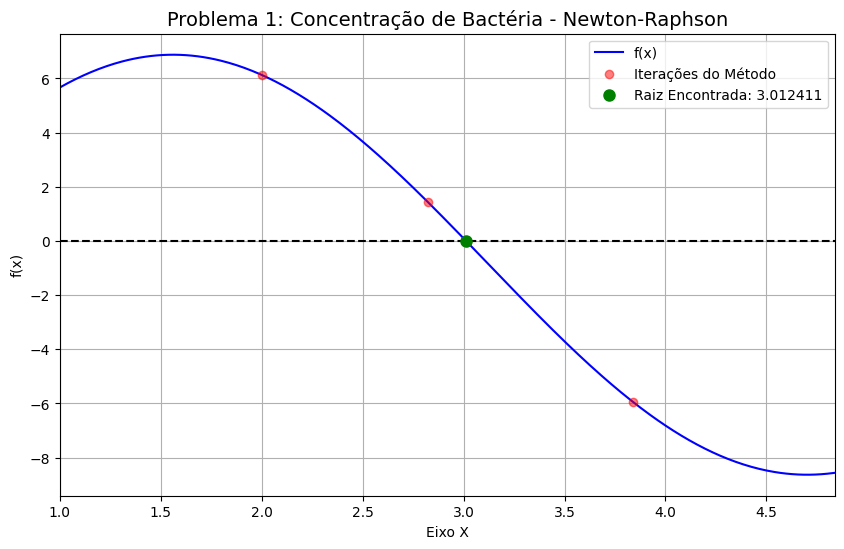

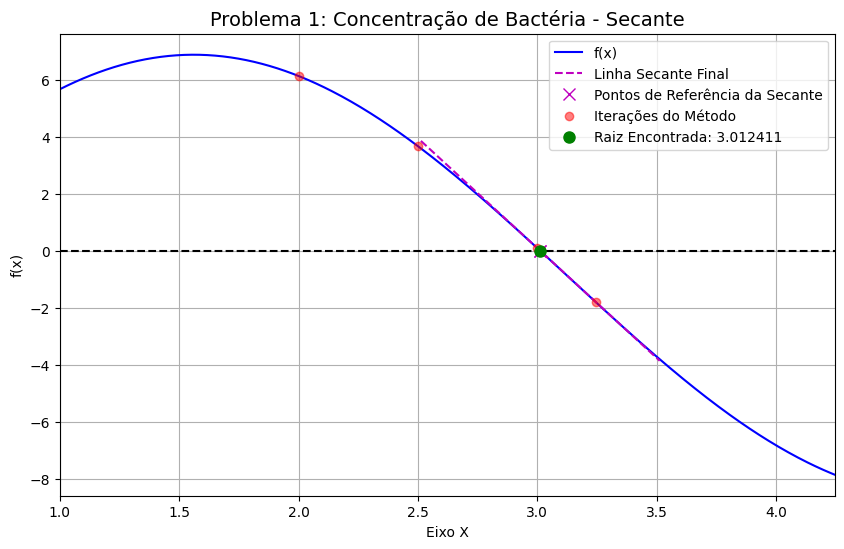


Executando: Problema 2: Deslocamento de Estruturas
Raiz encontrada em 0.4475746154785156 após 18 iterações.


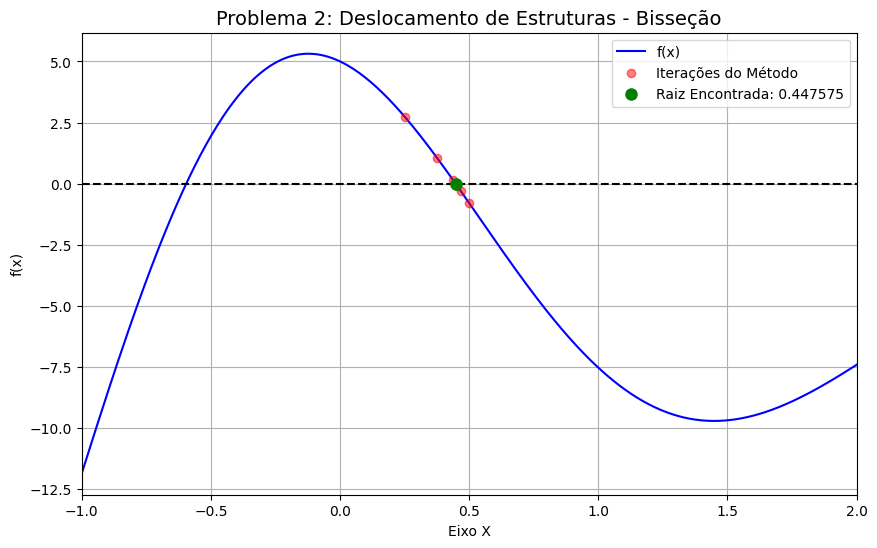

Raiz encontrada em 0.4475745266054121 após 4 iterações.


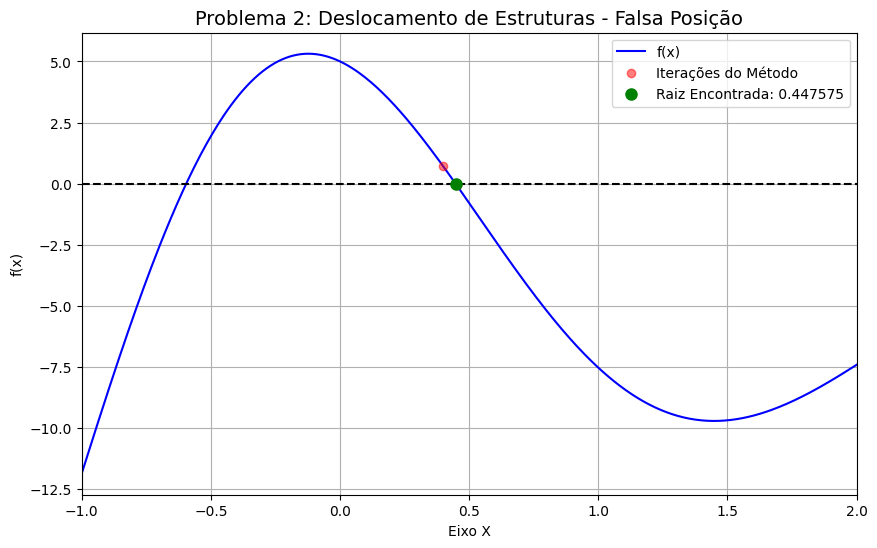

Raiz encontrada em 0.4475745879311346 após 2 iterações.


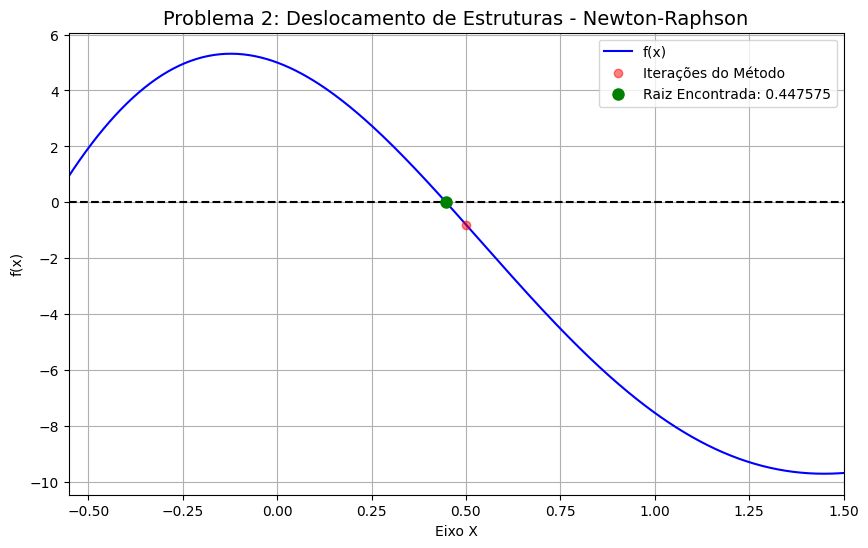

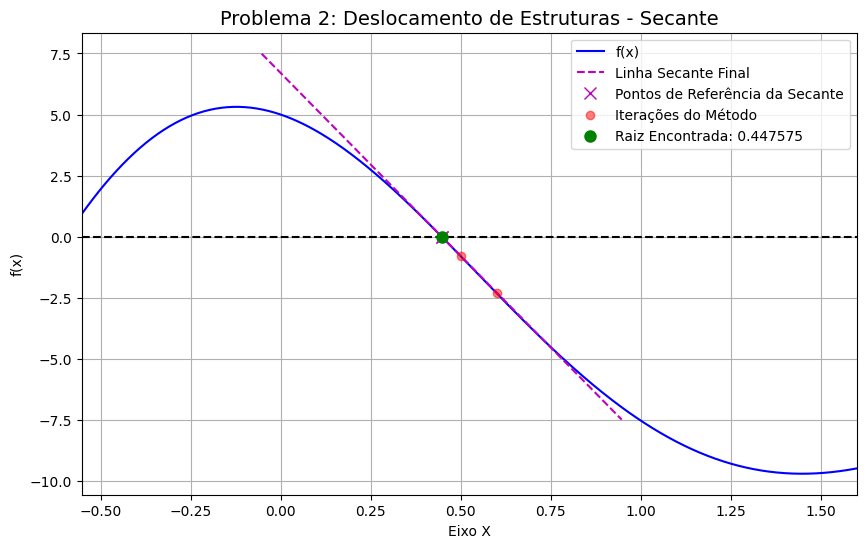


--------------------------------------------------------------------------------
TABELA COMPARATIVA FINAL - PROBLEMA 1
--------------------------------------------------------------------------------


,Método,Raiz,Iterações,Tempo (s),Precisão
0,Newton-Raphson,3.01241085,5,0.001000,4.29e-13
1,Secante,3.01241085,5,0.000000,8.27e-13



--------------------------------------------------------------------------------
TABELA COMPARATIVA FINAL - PROBLEMA 2
--------------------------------------------------------------------------------


,Método,Raiz,Iterações,Tempo (s),Precisão
0,Bisseção,0.44757462,18,0.000000,7.93e-07
1,Falsa Posição,0.44757453,4,0.001375,5.38e-07
2,Newton-Raphson,0.44757459,2,0.000000,3.81e-07
3,Secante,0.44757456,4,0.000000,1.07e-14


In [36]:
# =============================================================================
# PARÂMETROS GLOBAIS PARA EXECUÇÃO
# =============================================================================
TOLERANCIA = 1e-6
MAX_ITERACOES = 100

# =============================================================================
# FUNÇÃO PARA EXECUTAR E COMPARAR UM PROBLEMA (ATUALIZADA)
# =============================================================================
def executar_comparativo(f, df, x0_newton, x1_secante, a_bissec_fp, b_bissec_fp, nome_problema):
    """Executa Bisseção, Falsa Posição, Newton-Raphson e Secante e coleta métricas."""

    print(f"\n{'='*60}\nExecutando: {nome_problema}\n{'='*60}")
    
    resultados = []

    # --- 1. MÉTODO DA BISSECÇÃO ---
    start_time = time.time()
    raiz_b, iteracoes_b = metodo_bisseccao(f, a_bissec_fp, b_bissec_fp, tol=TOLERANCIA, max_iter=MAX_ITERACOES)
    end_time = time.time()
    
    if raiz_b is not None:
        resultados.append({
            'Método': 'Bisseção',
            'Raiz': raiz_b,
            'Iterações': len(iteracoes_b),
            'Tempo (s)': end_time - start_time,
            'Precisão': np.abs(f(raiz_b))
        })
        plotar_resultados(f, raiz_b, iteracoes_b, f'{nome_problema} - Bisseção', a_bissec_fp, b_bissec_fp)

    # --- 2. MÉTODO DA FALSA POSIÇÃO ---
    start_time = time.time()
    raiz_fp, iteracoes_fp = falsa_posicao(f, a_bissec_fp, b_bissec_fp, tol=TOLERANCIA, max_iter=MAX_ITERACOES)
    end_time = time.time()

    if raiz_fp is not None:
        resultados.append({
            'Método': 'Falsa Posição',
            'Raiz': raiz_fp,
            'Iterações': len(iteracoes_fp),
            'Tempo (s)': end_time - start_time,
            'Precisão': np.abs(f(raiz_fp))
        })
        plotar_resultados(f, raiz_fp, iteracoes_fp, f'{nome_problema} - Falsa Posição', a_bissec_fp, b_bissec_fp)
        
    # --- 3. MÉTODO DE NEWTON-RAPHSON ---
    start_time = time.time()
    raiz_nr, iteracoes_nr = newton_raphson(f, df, x0_newton, tol=TOLERANCIA, max_iter=MAX_ITERACOES)
    end_time = time.time()

    if raiz_nr is not None:
        # Newton e Secante contam x0 no início da lista, a iteração de busca começa depois.
        num_iteracoes = len(iteracoes_nr) - 1 
        a_nr, b_nr = min(iteracoes_nr), max(iteracoes_nr)
        resultados.append({
            'Método': 'Newton-Raphson',
            'Raiz': raiz_nr,
            'Iterações': num_iteracoes,
            'Tempo (s)': end_time - start_time,
            'Precisão': np.abs(f(raiz_nr))
        })
        plotar_resultados(f, raiz_nr, iteracoes_nr, f'{nome_problema} - Newton-Raphson', a_nr, b_nr)

    # --- 4. MÉTODO DA SECANTE---
    start_time = time.time()
    raiz_sec, iteracoes_sec = metodo_secante(f, x0_newton, x1_secante, tol=TOLERANCIA, max_iter=MAX_ITERACOES)
    end_time = time.time()
    
    if raiz_sec is not None:
        # Secante também conta x0 e x1 no início da lista
        num_iteracoes = len(iteracoes_sec) - 2 
        a_sec, b_sec = min(iteracoes_sec), max(iteracoes_sec)
        resultados.append({
            'Método': 'Secante',
            'Raiz': raiz_sec,
            'Iterações': num_iteracoes,
            'Tempo (s)': end_time - start_time,
            'Precisão': np.abs(f(raiz_sec))
        })
        plotar_resultados(f, raiz_sec, iteracoes_sec, f'{nome_problema} - Secante', a_sec, b_sec)

    return pd.DataFrame(resultados)

# =============================================================================
# EXECUÇÃO DOS PROBLEMAS DE ENGENHARIA (ATUALIZADA)
# =============================================================================

# --- Problema 1: Concentração de uma bactéria (f1(t) = 0) ---
try:
    df_p1 = executar_comparativo(
        f=f1, 
        df=df1, 
        x0_newton=2.0,       # Estimativa x0 para Newton/Secante
        x1_secante=2.5,      # Estimativa x1 para Secante
        a_bissec_fp=0.0, 
        b_bissec_fp=5.0, 
        nome_problema='Problema 1: Concentração de Bactéria'
    )
except Exception as e:
    print(f"Erro ao executar Problema 1: {e}")
    df_p1 = pd.DataFrame()


# --- Problema 2: Deslocamento de estruturas (f2(t) = 0) ---
try:
    df_p2 = executar_comparativo(
        f=f2, 
        df=df2, 
        x0_newton=0.5,        # Estimativa x0 para Newton/Secante
        x1_secante=0.6,       # Estimativa x1 para Secante
        a_bissec_fp=0.0, 
        b_bissec_fp=1.0, 
        nome_problema='Problema 2: Deslocamento de Estruturas'
    )
except Exception as e:
    print(f"Erro ao executar Problema 2: {e}")
    df_p2 = pd.DataFrame()


# =============================================================================
# TABELA COMPARATIVA FINAL 
# =============================================================================

def print_tabela(df, titulo):
    """Exibe o DataFrame com formatação elegante."""
    if df.empty:
        print(f"Não há dados para exibir em {titulo}.")
        return
        
    # Formatação das colunas para melhor visualização
    tabela_formatada = df.style.format({
        'Raiz': '{:.8f}',
        'Tempo(s)': '{:.6f}',
        'Precisão': '{:.2e}' # Notação científica para precisão (muito pequeno)
    }).set_caption(titulo).background_gradient(subset=['Iterações', 'Tempo (s)'], cmap='YlOrRd')
    
    print(f"\n{'-'*80}")
    print(f"TABELA COMPARATIVA FINAL - {titulo}")
    print('-'*80)
    display(tabela_formatada) 
    
# Exibir tabelas
try:
    from IPython.display import display
except ImportError:
    def display(df): print(df)

print_tabela(df_p1, 'PROBLEMA 1')
print_tabela(df_p2, 'PROBLEMA 2')

# Solucionador Interativo

SOLUCIONADOR INTERATIVO DE RAÍZES
Utiliza busca automática de intervalo, se necessário.



Insira a função f(x) (ex: np.cos(x) - x):  x**2 - 7
Insira a derivada f'(x) (Deixe vazio se não souber):  



--- Parâmetros de Inicialização ---


   [x0]: Chute inicial para Newton/Secante (OBRIGATÓRIO):  


❗ Atenção: O chute inicial x0 é obrigatório. Por favor, insira um número.


   [x0]: Chute inicial para Newton/Secante (OBRIGATÓRIO):  1
   [a]: Limite inferior do intervalo [a, b] (Deixe vazio para busca automática):  
   [b]: Limite superior do intervalo [a, b] (Deixe vazio para busca automática):  


   Tentando encontrar um intervalo [a, b] automaticamente usando x0...
   ✅ Intervalo encontrado: [2.5000, 4.0000]


   [x1]: Segundo chute inicial para Secante (sugerido: 1.1000 se vazio):  
   Tolerância (ex: 1e-3,  se vazio usa 1e-6):  1e-3
   Máximo de iterações (ex: 50, se vazio usa 100):  



EXECUTANDO MÉTODOS
Raiz encontrada em 2.645751953125 após 11 iterações.


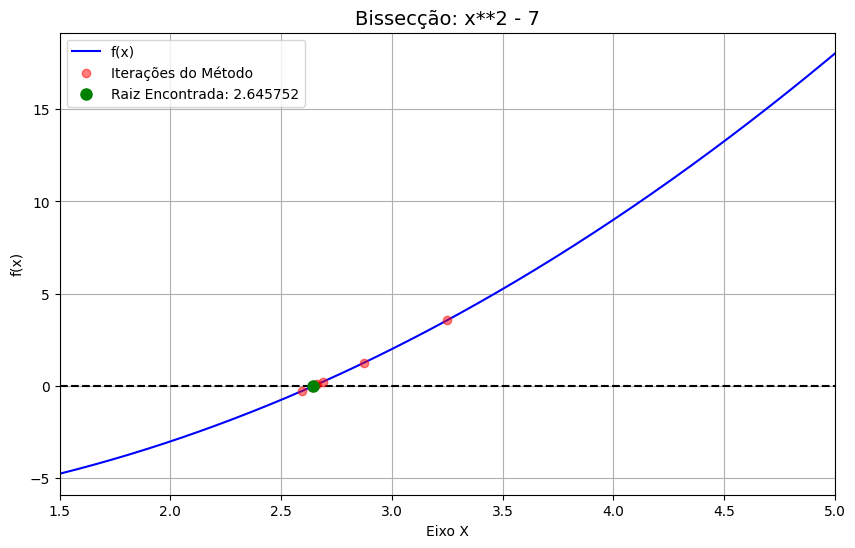

Raiz encontrada em 2.6456986475231035 após 5 iterações.


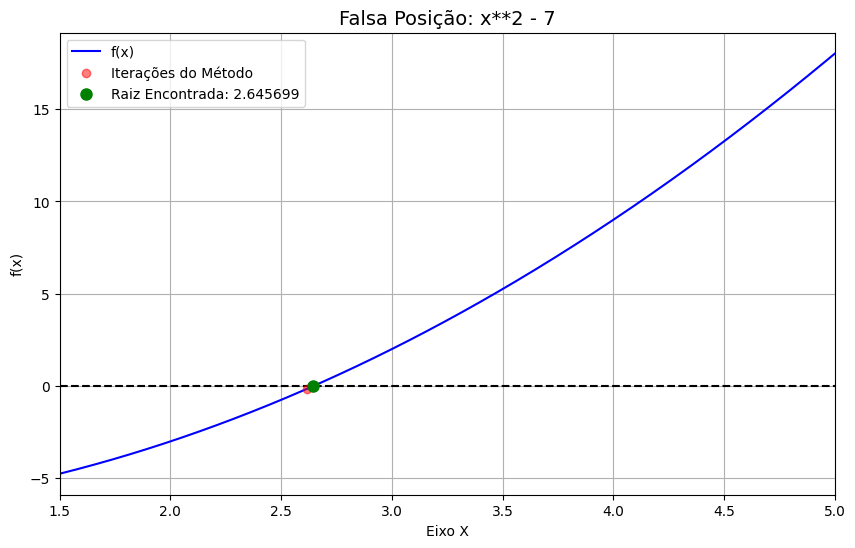

Método de Newton-Raphson ignorado: Derivada f'(x) não fornecida.


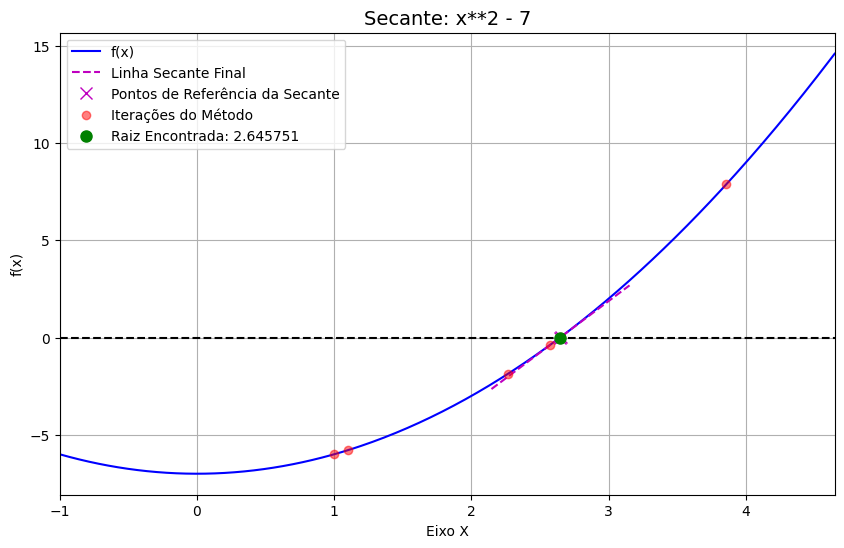


TABELA COMPARATIVA PARA f(x) = x**2 - 7


Método,Raiz,Iterações,Tempo (s)
Bissecção,2.64575195,10,0.000000
Falsa Posição,2.64569865,4,0.000000
Secante,2.64575122,6,0.000000




Deseja testar outra função? (s/n):  n



Encerrando o solucionador interativo. Obrigado!


In [38]:
import numpy as np
import time
import pandas as pd
from IPython.display import display, HTML 
# falsa_posicao, newton_raphson, metodo_secante, plotar_resultados) serão utilizadas.

# ----------------------------------------------------------------------
# 1. Função Auxiliar para criar funções dinamicamente (parser)
# ----------------------------------------------------------------------
def parse_func(func_str, variable='x'):
    """Cria uma função lambda a partir de uma string. Permite o uso de np."""
    try:
        # Garante que 'np' esteja disponível no escopo da função avaliada
        return eval(f"lambda {variable}: {func_str}", {'np': np})
    except Exception as e:
        print(f"❌ Erro ao criar a função a partir da string '{func_str}': {e}")
        return None

# ----------------------------------------------------------------------
# 2. Loop Principal Interativo 
# ----------------------------------------------------------------------
def interactive_solver_completo():
    print("=" * 70)
    print("SOLUCIONADOR INTERATIVO DE RAÍZES")
    print("Utiliza busca automática de intervalo, se necessário.")
    print("=" * 70)
    
    while True:
        # --- ENTRADA DA FUNÇÃO ---
        func_str = input("\nInsira a função f(x) (ex: np.cos(x) - x): ")
        f = parse_func(func_str)
        if f is None:
            continue
            
        df_str = input("Insira a derivada f'(x) (Deixe vazio se não souber): ")
        df = parse_func(df_str) if df_str.strip() else None

        # --- ENTRADA DOS PARÂMETROS ---
        try:
            print("\n--- Parâmetros de Inicialização ---")
            
            # 1. Chute Inicial x0 (Obrigatório) - Garante que o input não esteja vazio
            x0_input = ""
            while not x0_input.strip():
                x0_input = input("   [x0]: Chute inicial para Newton/Secante (OBRIGATÓRIO). Exemplo: 1: ")
                if not x0_input.strip():
                     print("❗ Atenção: O chute inicial x0 é obrigatório. Por favor, insira um número.")
            x0 = float(x0_input)
            
            # 2. Intervalo [a, b] (Opcional)
            a_input = input("   [a]: Limite inferior do intervalo [a, b] (Deixe vazio para busca automática): ")
            b_input = input("   [b]: Limite superior do intervalo [a, b] (Deixe vazio para busca automática): ")
            
            # 3. Tratamento do Intervalo (Usando sua função encontrar_intervalo)
            if a_input.strip() and b_input.strip():
                a = float(a_input)
                b = float(b_input)
                encontrou_intervalo = True
            else:
                print("   Tentando encontrar um intervalo [a, b] automaticamente usando x0...")
                # Chama a função existente no seu projeto
                a, b = encontrar_intervalo(f, ponto_inicial=x0) 
                if a is None or b is None:
                    print("❌ AVISO: Não foi possível encontrar um intervalo válido [a, b] automaticamente.")
                    encontrou_intervalo = False
                else:
                    print(f"   ✅ Intervalo encontrado: [{a:.4f}, {b:.4f}]")
                    encontrou_intervalo = True

            # 4. Segundo Chute x1 (Opcional, com valor padrão)
            sugestao_x1 = x0 + 0.1
            x1_input = input(f"   [x1]: Segundo chute inicial para Secante (sugerido: {sugestao_x1:.4f} se vazio): ")
            # Se vazio, usa o valor sugerido (x0 + 0.1)
            x1 = float(x1_input) if x1_input.strip() else sugestao_x1
            
            # 5. Tolerância e Max. Iterações (Opcionais, com valor padrão)
            tol_input = input("   Tolerância (ex: 1e-3,  se vazio usa 1e-6): ")
            # Se vazio, usa 1e-6
            tol = float(tol_input) if tol_input.strip() else 1e-6
            
            max_iter_input = input("   Máximo de iterações (ex: 50, se vazio usa 100): ")
            # Se vazio, usa 100
            max_iter = int(max_iter_input) if max_iter_input.strip() else 100

        except ValueError as e:
            # Captura erros de conversão para float/int em entradas numéricas inválidas
            print(f"\n❌ ERRO DE VALOR: Por favor, insira um valor numérico válido. Detalhe: {e}")
            continue
        
        # --- EXECUÇÃO DOS MÉTODOS ---
        
        resultados = []

        print("\n" + "=" * 70)
        print("EXECUTANDO MÉTODOS")
        print("=" * 70)
        
        # 1. Bissecção e Falsa Posição (só rodam se o intervalo for válido)
        if encontrou_intervalo:
            # Bissecção
            start = time.time()
            # Chama a função metodo_bisseccao do seu projeto
            raiz_b, iteracoes_b = metodo_bisseccao(f, a, b, tol, max_iter) 
            tempo_b = time.time() - start
            if raiz_b is not None:
                resultados.append({'Método': 'Bissecção', 'Raiz': raiz_b, 'Iterações': len(iteracoes_b) - 1, 'Tempo (s)': tempo_b})
                plotar_resultados(f, raiz_b, iteracoes_b, f"Bissecção: {func_str}", a, b)
                
            # Falsa Posição
            start = time.time()
            # Chama a função falsa_posicao do seu projeto
            raiz_fp, iteracoes_fp = falsa_posicao(f, a, b, tol, max_iter)
            tempo_fp = time.time() - start
            if raiz_fp is not None:
                resultados.append({'Método': 'Falsa Posição', 'Raiz': raiz_fp, 'Iterações': len(iteracoes_fp) - 1, 'Tempo (s)': tempo_fp})
                plotar_resultados(f, raiz_fp, iteracoes_fp, f"Falsa Posição: {func_str}", a, b)
        else:
            print("Métodos da Bissecção e Falsa Posição ignorados: Sem intervalo válido [a, b].")

        # 2. Newton-Raphson
        if df is not None:
            start = time.time()
            # Chama a função newton_raphson do seu projeto
            raiz_nr, iteracoes_nr = newton_raphson(f, df, x0, tol, max_iter)
            tempo_nr = time.time() - start
            if raiz_nr is not None:
                limite_min = min(x0, raiz_nr) - 1
                limite_max = max(x0, raiz_nr) + 1
                resultados.append({'Método': 'Newton-Raphson', 'Raiz': raiz_nr, 'Iterações': len(iteracoes_nr) - 1, 'Tempo (s)': tempo_nr})
                plotar_resultados(f, raiz_nr, iteracoes_nr, f"Newton-Raphson: {func_str}", limite_min, limite_max)
        else:
            print("Método de Newton-Raphson ignorado: Derivada f'(x) não fornecida.")

        # 3. Secante
        start = time.time()
        # Chama a função metodo_secante do seu projeto
        raiz_sec, iteracoes_sec = metodo_secante(f, x0, x1, tol, max_iter)
        tempo_sec = time.time() - start
        if raiz_sec is not None:
            limite_min = min(x0, x1, raiz_sec) - 1
            limite_max = max(x0, x1, raiz_sec) + 1
            resultados.append({'Método': 'Secante', 'Raiz': raiz_sec, 'Iterações': len(iteracoes_sec) - 2, 'Tempo (s)': tempo_sec})
            plotar_resultados(f, raiz_sec, iteracoes_sec, f"Secante: {func_str}", limite_min, limite_max)
            
        
        # --- EXIBIÇÃO DA TABELA ---
        df_resultados = pd.DataFrame([res for res in resultados if res['Raiz'] is not None])
        
        print(f"\n{'='*70}")
        print(f"TABELA COMPARATIVA PARA f(x) = {func_str}")
        print(f"{'='*70}")
        
        if not df_resultados.empty:
            tabela_formatada = df_resultados.style.hide(axis='index').format({
                'Raiz': '{:.8f}', 
                'Tempo (s)': '{:.6f}'
            }).background_gradient(subset=['Iterações', 'Tempo (s)'], cmap='YlOrRd')
            display(tabela_formatada)
        else:
            print("Nenhum método conseguiu convergir para uma raiz.")

        # --- CONTINUAR? ---
        continuar = input("\n\nDeseja testar outra função? (s/n): ").lower()
        if continuar.strip() != 's':
            print("\nEncerrando o solucionador interativo. Obrigado!")
            break

# ----------------------------------------------------------------------
# 3. Chamada da Função Principal
# ----------------------------------------------------------------------

if __name__ == '__main__':
    interactive_solver_completo()